Platt scaling
Nature of Probabilities:

Platt scaling is a post-processing technique that is applied after the Random Forest has been trained. It takes the scores (in the case of Random Forest, typically the raw class probabilities) and fits a logistic regression model to output calibrated probabilities.
How It Works:

You take the raw probabilities generated by the Random Forest (e.g., from predict_proba) and pass them through a logistic regression model that has been trained on a calibration dataset. This logistic regression model adjusts the probabilities to improve calibration.
The output is a more calibrated probability estimate, especially in cases where the original model’s probabilities are biased or poorly calibrated.
Use Case:

Platt scaling is particularly useful when the original model’s probability estimates are not well-calibrated, which can sometimes happen in models trained on imbalanced datasets or in models that output very high or low probabilities without a strong basis.
Advantages:

Improves the calibration of probabilities, making them more interpretable.
Useful when precise probability estimates are crucial for downstream tasks, like in risk assessment or decision-making.

Model

In [1]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score, classification_report

# # Load the dataset
# train_data = pd.read_csv('train_data(new).csv')
# val_data = pd.read_csv('val_data(new).csv')
# test_data = pd.read_csv('test_data(new).csv')

# # Ensure the data is sorted by the 'Entry_Date' column
# train_data['Entry_Date'] = pd.to_datetime(train_data['Entry_Date'])
# val_data['Entry_Date'] = pd.to_datetime(val_data['Entry_Date'])
# test_data['Entry_Date'] = pd.to_datetime(test_data['Entry_Date'])

# train_data = train_data.sort_values(by='Entry_Date')
# val_data = val_data.sort_values(by='Entry_Date')
# test_data = test_data.sort_values(by='Entry_Date')

# # Calculate the return (difference between Open and the previous period's Last)
# train_data['Open_Last_Return'] = train_data['Open'] - train_data['Last'].shift(1)
# val_data['Open_Last_Return'] = val_data['Open'] - val_data['Last'].shift(1)
# test_data['Open_Last_Return'] = test_data['Open'] - test_data['Last'].shift(1)

# # Drop NaN values created by the shift
# train_data.dropna(inplace=True)
# val_data.dropna(inplace=True)
# test_data.dropna(inplace=True)

# # Define the feature sets manually, excluding Open and Last, and including Open_Last_Return
# selected_features = [
#     'SMA5_At_Entry', 'SMA10_At_Entry', 'EMA5_At_Entry', 'EMA15_At_Entry', 'RSI5_At_Entry', 'RSI10_At_Entry',
#     'ATR5_At_Entry', 'ATR15_At_Entry', 'Stoch7_K_At_Entry', 'Stoch21_K_At_Entry',
#     'BB10_High_At_Entry', 'BB10_Low_At_Entry', 'BB10_MAvg_At_Entry',
#     'BB15_High_At_Entry', 'BB15_Low_At_Entry', 'BB15_MAvg_At_Entry',
#     'High', 'Low', 'MACD_At_Entry', 'Day_Of_Week_At_Entry',
#     'ROC14_At_Entry', 'ROC15_At_Entry', 'Open_Last_Return'
# ]

# # Separating features and target variable
# X_train = train_data[selected_features]
# y_train = train_data['Target']
# X_val = val_data[selected_features]
# y_val = val_data['Target']
# X_test = test_data[selected_features]
# y_test = test_data['Target']

# # Initialize the Random Forest Classifier
# rf_clf = RandomForestClassifier(
#     n_estimators=20,
#     max_depth=10,
#     min_samples_split=50,
#     min_samples_leaf=10,
#     random_state=42
# )

# # Fit the model to the training data
# rf_clf.fit(X_train, y_train)

# # Predict on the validation set
# y_val_pred = rf_clf.predict(X_val)

# # Calculate evaluation metrics for the validation set
# print("----- Validation Set Evaluation -----")
# print(classification_report(y_val, y_val_pred))
# roc_auc_val = roc_auc_score(y_val, y_val_pred)
# print(f"Validation ROC AUC: {roc_auc_val}")

# # Predict on the test set
# y_test_pred = rf_clf.predict(X_test)

# # Calculate evaluation metrics for the test set
# print("----- Test Set Evaluation -----")
# print(classification_report(y_test, y_test_pred))
# roc_auc_test = roc_auc_score(y_test, y_test_pred)
# print(f"Test ROC AUC: {roc_auc_test}")


----- Validation Set Evaluation -----
              precision    recall  f1-score   support

         0.0       0.64      0.69      0.66       480
         1.0       0.63      0.58      0.61       441

    accuracy                           0.64       921
   macro avg       0.64      0.64      0.64       921
weighted avg       0.64      0.64      0.64       921

Validation ROC AUC: 0.6351332199546484
----- Test Set Evaluation -----
              precision    recall  f1-score   support

         0.0       0.64      0.72      0.68       474
         1.0       0.66      0.57      0.61       447

    accuracy                           0.65       921
   macro avg       0.65      0.65      0.64       921
weighted avg       0.65      0.65      0.65       921

Test ROC AUC: 0.6450669725030442


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, roc_auc_score

# Load and prepare the dataset
def load_and_prepare_data():
    train_data = pd.read_csv('train_data(new2).csv')
    val_data = pd.read_csv('val_data(new2).csv')
    test_data = pd.read_csv('test_data(new2).csv')

    train_data['Entry_Date'] = pd.to_datetime(train_data['Entry_Date'])
    val_data['Entry_Date'] = pd.to_datetime(val_data['Entry_Date'])
    test_data['Entry_Date'] = pd.to_datetime(test_data['Entry_Date'])

    train_data = train_data.sort_values(by='Entry_Date')
    val_data = val_data.sort_values(by='Entry_Date')
    test_data = test_data.sort_values(by='Entry_Date')

    # train_data['Open_Last_Return'] = train_data['Open'] - train_data['Last'].shift(1)
    # val_data['Open_Last_Return'] = val_data['Open'] - val_data['Last'].shift(1)
    # test_data['Open_Last_Return'] = test_data['Open'] - test_data['Last'].shift(1)

    train_data.dropna(inplace=True)
    val_data.dropna(inplace=True)
    test_data.dropna(inplace=True)
    
    return train_data, val_data, test_data

# Train the model and evaluate it on the validation and test sets
def train_evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test):
    rf_clf = RandomForestClassifier(
        n_estimators=20,
        max_depth=10,
        min_samples_split=50,
        min_samples_leaf=10,
        random_state=42
    )
    rf_clf.fit(X_train, y_train)
    
    # Apply Platt scaling
    calibrated_rf_clf = CalibratedClassifierCV(estimator=rf_clf, method='sigmoid')
    calibrated_rf_clf.fit(X_train, y_train)
    
    # Validation set evaluation
    y_val_pred = calibrated_rf_clf.predict(X_val)
    y_val_pred_proba = calibrated_rf_clf.predict_proba(X_val)[:, 1]
    print("----- Validation Set Evaluation -----")
    print(classification_report(y_val, y_val_pred))
    roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)
    print(f"Validation ROC AUC: {roc_auc_val}")

    # Test set evaluation
    y_test_pred = calibrated_rf_clf.predict(X_test)
    y_test_pred_proba = calibrated_rf_clf.predict_proba(X_test)[:, 1]
    print("----- Test Set Evaluation -----")
    print(classification_report(y_test, y_test_pred))
    roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
    print(f"Test ROC AUC: {roc_auc_test}")

    # Sort the test results by predicted probabilities
    test_results = pd.DataFrame({
        'Predicted_Probability': y_test_pred_proba,
        'Actual_Profit': y_test
    })
    sorted_test_results = test_results.sort_values(by='Predicted_Probability', ascending=False)
    print("Sorted test results by predicted probabilities:")
    print(sorted_test_results)

    # Display top 10 predicted probabilities and actual profits
    top_n = 10
    top_n_results = sorted_test_results.head(top_n)
    print(f"Top {top_n} predicted probabilities and actual profits:")
    print(top_n_results)
    
    return calibrated_rf_clf, sorted_test_results

# Prepare features and target
train_data, val_data, test_data = load_and_prepare_data()

selected_features = [
    'SMA5_At_Entry', 'SMA10_At_Entry', 'EMA5_At_Entry', 'EMA15_At_Entry', 'RSI5_At_Entry', 'RSI10_At_Entry',
    'ATR5_At_Entry', 'ATR15_At_Entry', 'Stoch7_K_At_Entry', 'Stoch21_K_At_Entry',
    'BB10_High_At_Entry', 'BB10_Low_At_Entry', 'BB10_MAvg_At_Entry',
    'BB15_High_At_Entry', 'BB15_Low_At_Entry', 'BB15_MAvg_At_Entry',
    'High', 'Low', 'MACD_At_Entry', 'Day_Of_Week_At_Entry',
    'ROC14_At_Entry', 'ROC15_At_Entry', 'Open' , 'Low', 'High', 'Last'
]

X_train = train_data[selected_features]
y_train = train_data['Target']
X_val = val_data[selected_features]
y_val = val_data['Target']
X_test = test_data[selected_features]
y_test = test_data['Target']

# Train the model, evaluate it, and get sorted test results
calibrated_rf_clf, sorted_test_results = train_evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test)

# Add predicted confidence to test_data for use in allocation methods
test_data['Predicted_Confidence'] = sorted_test_results['Predicted_Probability'].values


----- Validation Set Evaluation -----
              precision    recall  f1-score   support

         0.0       0.63      0.56      0.59       480
         1.0       0.57      0.64      0.60       442

    accuracy                           0.60       922
   macro avg       0.60      0.60      0.60       922
weighted avg       0.60      0.60      0.60       922

Validation ROC AUC: 0.6450556184012066
----- Test Set Evaluation -----
              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61       475
         1.0       0.59      0.62      0.60       447

    accuracy                           0.61       922
   macro avg       0.61      0.61      0.61       922
weighted avg       0.61      0.61      0.61       922

Test ROC AUC: 0.6529494878134936
Sorted test results by predicted probabilities:
     Predicted_Probability  Actual_Profit
606               0.621498            1.0
607               0.621498            0.0
704               0.619067    

Equal allocation


/var/folders/zw/9vch0yrs50jfl_28l8p1__m80000gn/T/ipykernel_54439/3184135062.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, new_row], ignore_index=True)
/var/folders/zw/9vch0yrs50jfl_28l8p1__m80000gn/T/ipykernel_54439/3184135062.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, new_row], ignore_index=True)


Standard Approach Final Capital:
strategy_1: 33.163554605015484
strategy_2: -19.154105052575616
strategy_3: 64.9342039427187
strategy_4: 21.51491183703366
Standard Approach Total Profit/Loss: 0.4585653321922365

ML Approach Final Capital:
strategy_1: 57.145228298324476
strategy_2: 18.051094903804536
strategy_3: 51.27133268596349
strategy_4: 24.484573528895016
ML Approach Total Profit/Loss: 50.952229416987535


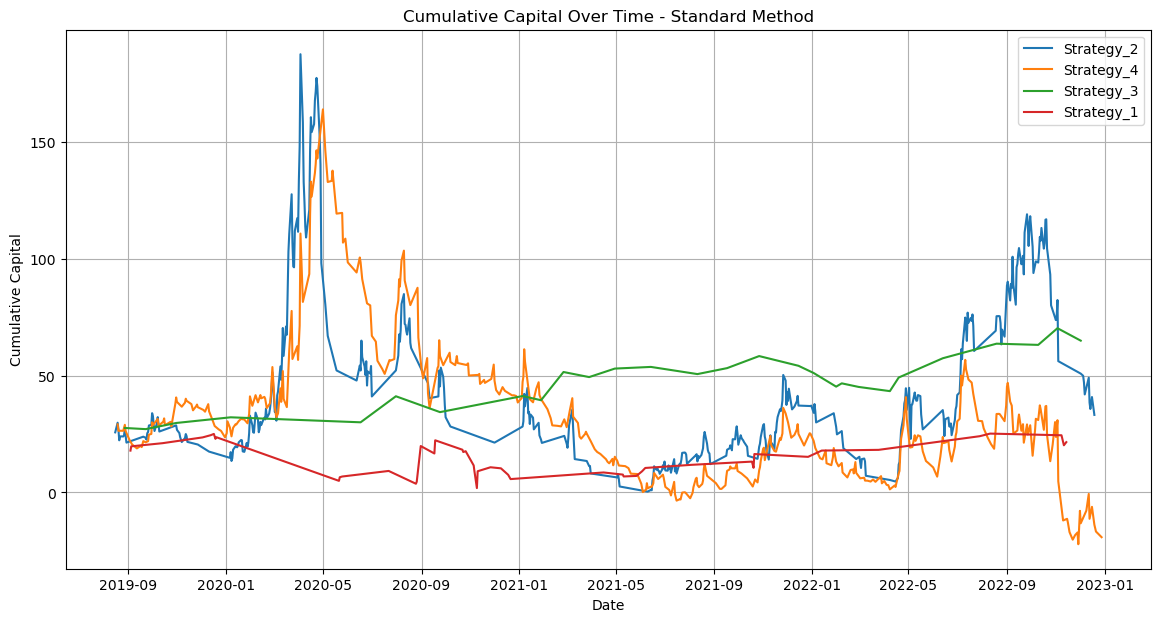

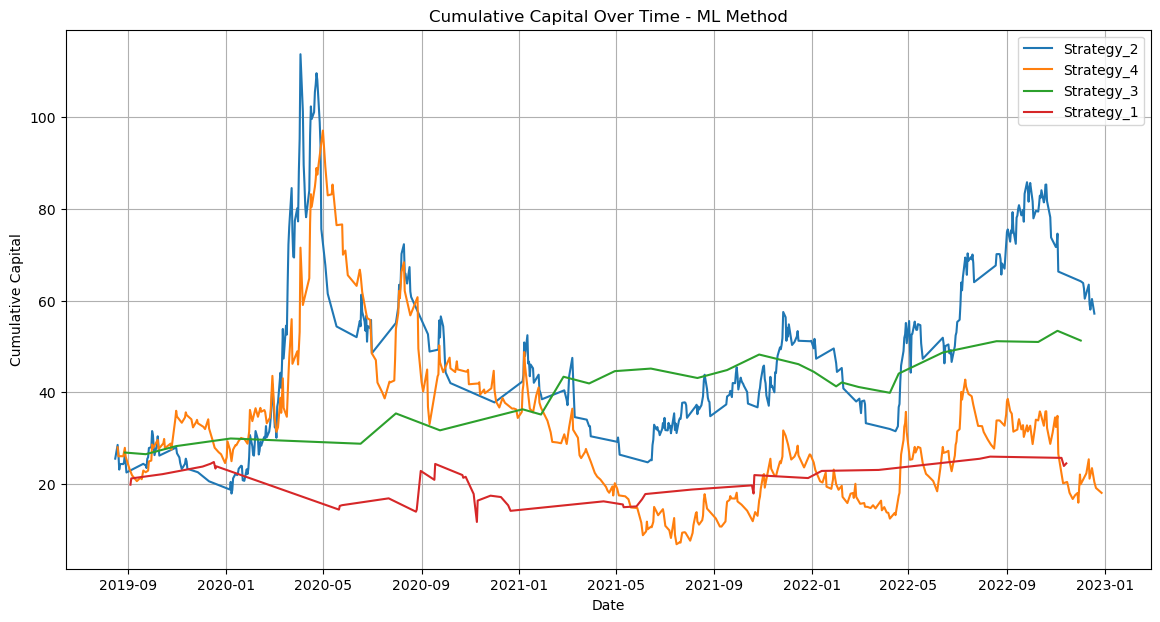

Standard Approach Metrics:
ROI: 0.00
Maximum Drawdown: -1.12
Sharpe Ratio: 0.01
Sortino Ratio: 0.01
Win Rate: 0.49

ML Approach Metrics:
ROI: 0.51
Maximum Drawdown: -0.94
Sharpe Ratio: 0.21
Sortino Ratio: 0.60
Win Rate: 0.49


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure Strategy_Code is correctly mapped to each Trade_ID
unique_strategies = test_data['Strategy'].unique()
strategy_mapping = {unique_strategies[i]: f'strategy_{i+1}' for i in range(len(unique_strategies))}
test_data['Strategy_Code'] = test_data['Strategy'].map(strategy_mapping)

# Verify that the mapping is correct
for strategy in unique_strategies:
    strategy_code = strategy_mapping[strategy]
    assert all(test_data[test_data['Strategy'] == strategy]['Strategy_Code'] == strategy_code), f"Mismatch in mapping for {strategy}"

# Initialize initial capital
initial_capital = 100  # Example initial capital

# Initialize dataframes to store capital allocation and cumulative capital for each approach
columns = ['Trade_ID', 'Strategy', 'Profit_Loss', 'Predicted_Confidence', 'Allocated_Capital', 'Strat_Cum', 'Total_Cum', 'Entry_Date']
standard_df = pd.DataFrame(columns=columns)
ml_df = pd.DataFrame(columns=columns)

# Initialize capital for standard and ML approaches
strategy_capital_standard = {strategy: initial_capital / len(unique_strategies) for strategy in strategy_mapping.values()}
strategy_capital_ml = {strategy: initial_capital / len(unique_strategies) for strategy in strategy_mapping.values()}

# Function to record a trade
def record_trade(df, trade_id, original_strategy, profit_loss, predicted_confidence, allocated_capital, cumulative_capital_strategy, cumulative_capital, entry_date):
    new_row = pd.DataFrame([{
        'Trade_ID': trade_id,
        'Strategy': original_strategy,  # Keep the original strategy label
        'Profit_Loss': profit_loss,
        'Predicted_Confidence': predicted_confidence,
        'Allocated_Capital': allocated_capital,
        'Strat_Cum': cumulative_capital_strategy,
        'Total_Cum': cumulative_capital,
        'Entry_Date': entry_date
    }])
    return pd.concat([df, new_row], ignore_index=True)

# Function to update and record trades for a given approach
def execute_trades(strategy_trades, strategy_capital, record_df, use_ml):
    cumulative_capital_strategy = {strategy: initial_capital / len(unique_strategies) for strategy in strategy_mapping.values()}
    
    for date, trades_on_date in test_data.groupby('Entry_Date'):
        total_capital = sum(strategy_capital.values())
        
        # Redistribute the total capital equally among all strategies
        allocated_capital = {s: total_capital / len(unique_strategies) for s in strategy_mapping.values()}
        
        for idx, trade in trades_on_date.iterrows():
            strategy = trade['Strategy_Code']
            original_strategy = trade['Strategy']  # Use the original strategy name
            trade_id = trade['Trade_ID']
            predicted_confidence = trade['Predicted_Confidence']
            profit_loss = trade['Profit_Loss']
            
            if use_ml:
                # Adjust allocation based on predicted confidence but not exceeding equal share
                adjusted_allocation = min(allocated_capital[strategy], allocated_capital[strategy] * predicted_confidence)
                
                # Update capital based on adjusted allocation and trade outcome
                strategy_capital[strategy] += adjusted_allocation * profit_loss
                cumulative_capital_strategy[strategy] += adjusted_allocation * profit_loss
                
                # Record the trade in the dataframe
                record_df = record_trade(
                    record_df, trade_id, original_strategy, profit_loss, predicted_confidence,
                    adjusted_allocation, cumulative_capital_strategy[strategy], sum(strategy_capital.values()), date
                )
            else:
                # Standard approach: equal allocation
                strategy_capital[strategy] += allocated_capital[strategy] * profit_loss
                cumulative_capital_strategy[strategy] += allocated_capital[strategy] * profit_loss
                
                # Record the trade in the dataframe
                record_df = record_trade(
                    record_df, trade_id, original_strategy, profit_loss, predicted_confidence,
                    allocated_capital[strategy], cumulative_capital_strategy[strategy], sum(strategy_capital.values()), date
                )
    
    final_cumulative_capital = sum(strategy_capital.values())
    return record_df, final_cumulative_capital, cumulative_capital_strategy

# Split the test data into the strategies based on the new mapping
strategy_trades = {strategy: test_data[test_data['Strategy_Code'] == strategy] for strategy in strategy_mapping.values()}

# Execute trades for the standard approach
standard_df, final_cumulative_capital_standard, final_cumulative_capital_strategy_standard = execute_trades(strategy_trades, strategy_capital_standard, standard_df, use_ml=False)

# Execute trades for the ML approach
ml_df, final_cumulative_capital_ml, final_cumulative_capital_strategy_ml = execute_trades(strategy_trades, strategy_capital_ml, ml_df, use_ml=True)

# Calculate total profit/loss
total_profit_loss_standard = final_cumulative_capital_standard - initial_capital
total_profit_loss_ml = final_cumulative_capital_ml - initial_capital

# Output the final capital for each strategy and total profit/loss
print("Standard Approach Final Capital:")
for strategy, capital in final_cumulative_capital_strategy_standard.items():
    print(f"{strategy}: {capital}")
print(f"Standard Approach Total Profit/Loss: {total_profit_loss_standard}")

print("\nML Approach Final Capital:")
for strategy, capital in final_cumulative_capital_strategy_ml.items():
    print(f"{strategy}: {capital}")
print(f"ML Approach Total Profit/Loss: {total_profit_loss_ml}")

# Save the dataframes to CSV files
standard_df.to_csv('standard_allocation(equalPLATT).csv', index=False)
ml_df.to_csv('ml_allocation(equalPLATT).csv', index=False)

# Plot cumulative capital over time for each strategy for the standard method
plt.figure(figsize=(14, 7))
for strategy in unique_strategies:
    strategy_data = standard_df[standard_df['Strategy'] == strategy]
    plt.plot(strategy_data['Entry_Date'], strategy_data['Strat_Cum'], label=strategy)
plt.xlabel('Date')
plt.ylabel('Cumulative Capital')
plt.title('Cumulative Capital Over Time - Standard Method')
plt.legend()
plt.grid(True)
plt.savefig('standard_allocation(equalPLATT).png')
plt.show()

# Plot cumulative capital over time for each strategy for the ML method
plt.figure(figsize=(14, 7))
for strategy in unique_strategies:
    strategy_data = ml_df[ml_df['Strategy'] == strategy]
    plt.plot(strategy_data['Entry_Date'], strategy_data['Strat_Cum'], label=strategy)
plt.xlabel('Date')
plt.ylabel('Cumulative Capital')
plt.title('Cumulative Capital Over Time - ML Method')
plt.legend()
plt.grid(True)
plt.savefig('ml_allocation(equalPLATT).png')
plt.show()

# Function to calculate ROI
def calculate_roi(final_capital, initial_capital):
    return (final_capital - initial_capital) / initial_capital

# Function to calculate maximum drawdown
def calculate_max_drawdown(cumulative_returns):
    roll_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / roll_max - 1.0
    max_drawdown = drawdown.cummin().min()
    return max_drawdown

# Function to calculate Sharpe ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

# Function to calculate Sortino ratio
def calculate_sortino_ratio(returns, risk_free_rate=0.01):
    downside_returns = returns[returns < risk_free_rate]
    expected_return = returns.mean() - risk_free_rate
    downside_deviation = downside_returns.std()
    return expected_return / downside_deviation

# Function to calculate win rate
def calculate_win_rate(profits):
    wins = (profits > 0).sum()
    total = len(profits)
    return wins / total

# Standard approach metrics
standard_roi = calculate_roi(final_cumulative_capital_standard, initial_capital)
standard_max_drawdown = calculate_max_drawdown(standard_df['Strat_Cum'])
standard_returns = standard_df['Strat_Cum'].pct_change().dropna()
standard_sharpe_ratio = calculate_sharpe_ratio(standard_returns)
standard_sortino_ratio = calculate_sortino_ratio(standard_returns)
standard_win_rate = calculate_win_rate(standard_df['Profit_Loss'])

# ML approach metrics
ml_roi = calculate_roi(final_cumulative_capital_ml, initial_capital)
ml_max_drawdown = calculate_max_drawdown(ml_df['Strat_Cum'])
ml_returns = ml_df['Strat_Cum'].pct_change().dropna()
ml_sharpe_ratio = calculate_sharpe_ratio(ml_returns)
ml_sortino_ratio = calculate_sortino_ratio(ml_returns)
ml_win_rate = calculate_win_rate(ml_df['Profit_Loss'])

# Print the metrics
print("Standard Approach Metrics:")
print(f"ROI: {standard_roi:.2f}")
print(f"Maximum Drawdown: {standard_max_drawdown:.2f}")
print(f"Sharpe Ratio: {standard_sharpe_ratio:.2f}")
print(f"Sortino Ratio: {standard_sortino_ratio:.2f}")
print(f"Win Rate: {standard_win_rate:.2f}")

print("\nML Approach Metrics:")
print(f"ROI: {ml_roi:.2f}")
print(f"Maximum Drawdown: {ml_max_drawdown:.2f}")
print(f"Sharpe Ratio: {ml_sharpe_ratio:.2f}")
print(f"Sortino Ratio: {ml_sortino_ratio:.2f}")
print(f"Win Rate: {ml_win_rate:.2f}")


All-in allocation

/var/folders/zw/9vch0yrs50jfl_28l8p1__m80000gn/T/ipykernel_54439/1076243432.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, new_row], ignore_index=True)
/var/folders/zw/9vch0yrs50jfl_28l8p1__m80000gn/T/ipykernel_54439/1076243432.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, new_row], ignore_index=True)


Standard Approach Final Capital:
strategy_1: 33.163554605015484
strategy_2: -19.154105052575616
strategy_3: 64.9342039427187
strategy_4: 21.51491183703366
Standard Approach Total Profit/Loss: -99.79655497249162

ML Approach Final Capital:
strategy_1: 57.145228298324476
strategy_2: 18.051094903804536
strategy_3: 51.27133268596349
strategy_4: 24.484573528895016
ML Approach Total Profit/Loss: 1043.5900956913656


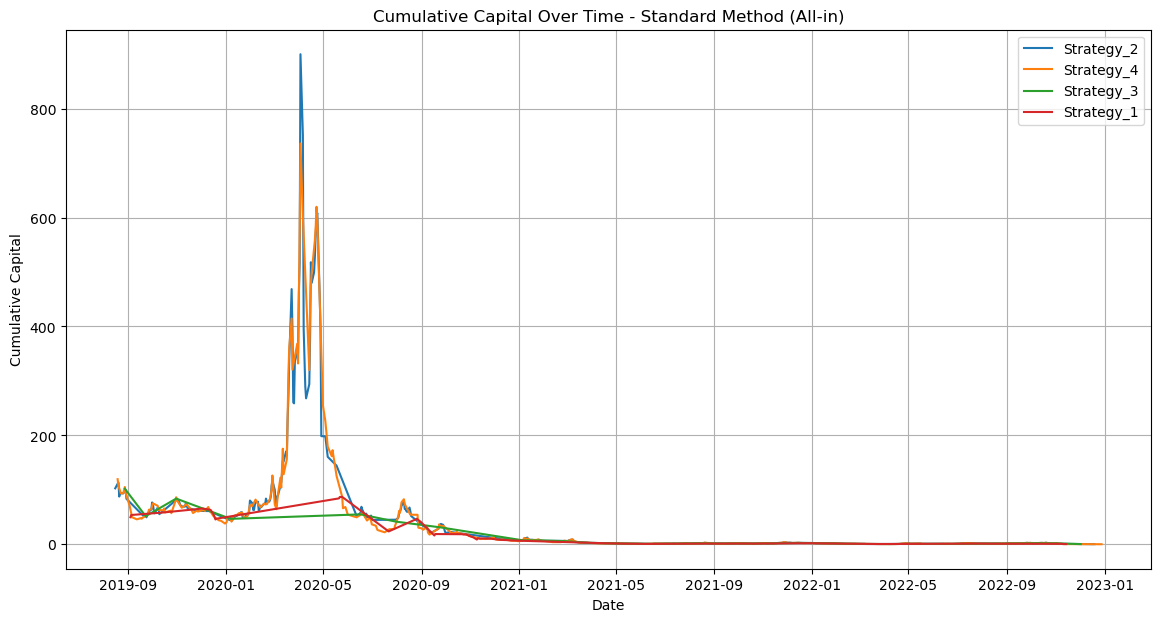

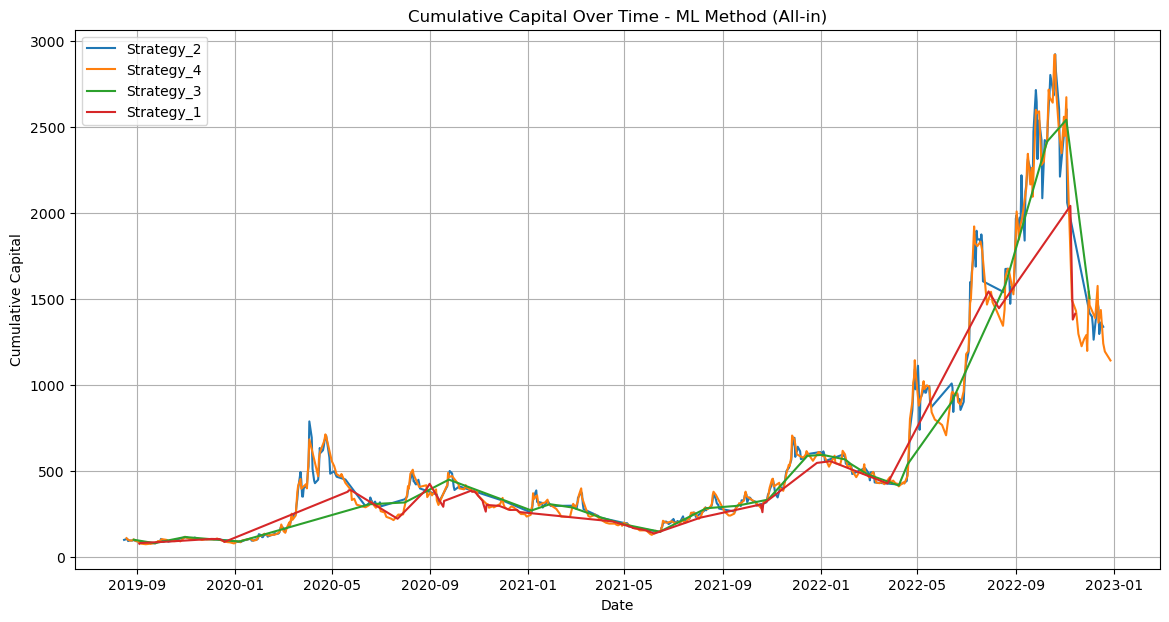

Standard Approach Metrics:
ROI: -1.00
Maximum Drawdown: -1.00
Sharpe Ratio: -0.09
Sortino Ratio: -0.14
Win Rate: 0.49

ML Approach Metrics:
ROI: 10.44
Maximum Drawdown: -0.83
Sharpe Ratio: -0.09
Sortino Ratio: -0.16
Win Rate: 0.49


In [29]:
# Ensure Strategy_Code is correctly mapped to each Trade_ID
unique_strategies = test_data['Strategy'].unique()
strategy_mapping = {unique_strategies[i]: f'strategy_{i+1}' for i in range(len(unique_strategies))}
test_data['Strategy_Code'] = test_data['Strategy'].map(strategy_mapping)

# Verify that the mapping is correct
for strategy in unique_strategies:
    strategy_code = strategy_mapping[strategy]
    assert all(test_data[test_data['Strategy'] == strategy]['Strategy_Code'] == strategy_code), f"Mismatch in mapping for {strategy}"

# Predict the confidence scores using the calibrated Random Forest model
test_data['Predicted_Confidence'] = calibrated_rf_clf.predict_proba(X_test)[:, 1]  # Assuming positive class confidence

# Initialize initial capital
initial_capital = 100  # Example initial capital

# Initialize dataframes to store capital allocation and cumulative capital for each approach
columns = ['Trade_ID', 'Strategy', 'Profit_Loss', 'Predicted_Confidence', 'Allocated_Capital', 'Strat_Cum', 'Total_Cum', 'Entry_Date']
standard_df = pd.DataFrame(columns=columns)
ml_df = pd.DataFrame(columns=columns)

# Initialize capital for standard and ML approaches
capital_standard = initial_capital
capital_ml = initial_capital

# Function to record a trade
def record_trade(df, trade_id, original_strategy, profit_loss, predicted_confidence, allocated_capital, cumulative_capital_strategy, cumulative_capital, entry_date):
    new_row = pd.DataFrame([{
        'Trade_ID': trade_id,
        'Strategy': original_strategy,  # Keep the original strategy label
        'Profit_Loss': profit_loss,
        'Predicted_Confidence': predicted_confidence,
        'Allocated_Capital': allocated_capital,
        'Strat_Cum': cumulative_capital_strategy,
        'Total_Cum': cumulative_capital,
        'Entry_Date': entry_date
    }])
    return pd.concat([df, new_row], ignore_index=True)

# Function to execute trades for the All-in method
def execute_trades(test_data, capital, record_df, use_ml):
    for date, trades_on_date in test_data.groupby('Entry_Date'):
        # Identify active strategies on this date
        active_strategies = trades_on_date['Strategy_Code'].unique()
        num_active_strategies = len(active_strategies)
        
        # Allocate capital equally among active strategies
        allocated_capital = {strategy: capital / num_active_strategies for strategy in active_strategies}
        
        for idx, trade in trades_on_date.iterrows():
            strategy = trade['Strategy_Code']
            original_strategy = trade['Strategy']  # Use the original strategy name
            trade_id = trade['Trade_ID']
            predicted_confidence = trade['Predicted_Confidence']
            profit_loss = trade['Profit_Loss']
            
            if use_ml:
                # Adjust allocation based on predicted confidence
                adjusted_allocation = allocated_capital[strategy] * predicted_confidence
                
                # Update capital based on adjusted allocation and trade outcome
                capital += adjusted_allocation * profit_loss
                
                # Record the trade in the dataframe
                record_df = record_trade(
                    record_df, trade_id, original_strategy, profit_loss, predicted_confidence,
                    adjusted_allocation, capital, capital, date
                )
            else:
                # Standard approach: equal allocation
                capital += allocated_capital[strategy] * profit_loss
                
                # Record the trade in the dataframe
                record_df = record_trade(
                    record_df, trade_id, original_strategy, profit_loss, predicted_confidence,
                    allocated_capital[strategy], capital, capital, date
                )
    
    return record_df, capital

# Execute trades for the standard approach
standard_df, final_capital_standard = execute_trades(test_data, capital_standard, standard_df, use_ml=False)

# Execute trades for the ML approach
ml_df, final_capital_ml = execute_trades(test_data, capital_ml, ml_df, use_ml=True)

# Calculate total profit/loss
total_profit_loss_standard = final_capital_standard - initial_capital
total_profit_loss_ml = final_capital_ml - initial_capital

# Output the final capital for each strategy and total profit/loss
print("Standard Approach Final Capital:")
for strategy, capital in final_cumulative_capital_strategy_standard.items():
    print(f"{strategy}: {capital}")
print(f"Standard Approach Total Profit/Loss: {total_profit_loss_standard}")

print("\nML Approach Final Capital:")
for strategy, capital in final_cumulative_capital_strategy_ml.items():
    print(f"{strategy}: {capital}")
print(f"ML Approach Total Profit/Loss: {total_profit_loss_ml}")

# Save the dataframes to CSV files
standard_df.to_csv('standard_allocation(all_in).csv', index=False)
ml_df.to_csv('ml_allocation(all_in).csv', index=False)

# Plot cumulative capital over time for the standard method
plt.figure(figsize=(14, 7))
for strategy in unique_strategies:
    strategy_data = standard_df[standard_df['Strategy'] == strategy]
    plt.plot(strategy_data['Entry_Date'], strategy_data['Strat_Cum'], label=strategy)
plt.xlabel('Date')
plt.ylabel('Cumulative Capital')
plt.title('Cumulative Capital Over Time - Standard Method (All-in)')
plt.legend()
plt.grid(True)
plt.savefig('standard_allocation(all_in).png')
plt.show()

# Plot cumulative capital over time for the ML method
plt.figure(figsize=(14, 7))
for strategy in unique_strategies:
    strategy_data = ml_df[ml_df['Strategy'] == strategy]
    plt.plot(strategy_data['Entry_Date'], strategy_data['Strat_Cum'], label=strategy)
plt.xlabel('Date')
plt.ylabel('Cumulative Capital')
plt.title('Cumulative Capital Over Time - ML Method (All-in)')
plt.legend()
plt.grid(True)
plt.savefig('ml_allocation(all_in).png')
plt.show()

# Function to calculate ROI
def calculate_roi(final_capital, initial_capital):
    return (final_capital - initial_capital) / initial_capital

# Function to calculate maximum drawdown
def calculate_max_drawdown(cumulative_returns):
    roll_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / roll_max - 1.0
    max_drawdown = drawdown.cummin().min()
    return max_drawdown

# Function to calculate Sharpe ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

# Function to calculate Sortino ratio
def calculate_sortino_ratio(returns, risk_free_rate=0.01):
    downside_returns = returns[returns < risk_free_rate]
    expected_return = returns.mean() - risk_free_rate
    downside_deviation = downside_returns.std()
    return expected_return / downside_deviation

# Function to calculate win rate
def calculate_win_rate(profits):
    wins = (profits > 0).sum()
    total = len(profits)
    return wins / total

# Standard approach metrics
standard_roi = calculate_roi(final_capital_standard, initial_capital)
standard_max_drawdown = calculate_max_drawdown(standard_df['Strat_Cum'])
standard_returns = standard_df['Strat_Cum'].pct_change().dropna()
standard_sharpe_ratio = calculate_sharpe_ratio(standard_returns)
standard_sortino_ratio = calculate_sortino_ratio(standard_returns)
standard_win_rate = calculate_win_rate(standard_df['Profit_Loss'])

# ML approach metrics
ml_roi = calculate_roi(final_capital_ml, initial_capital)
ml_max_drawdown = calculate_max_drawdown(ml_df['Strat_Cum'])
ml_returns = ml_df['Strat_Cum'].pct_change().dropna()
ml_sharpe_ratio = calculate_sharpe_ratio(ml_returns)
ml_sortino_ratio = calculate_sortino_ratio(ml_returns)
ml_win_rate = calculate_win_rate(ml_df['Profit_Loss'])

# Print the metrics
print("Standard Approach Metrics:")
print(f"ROI: {standard_roi:.2f}")
print(f"Maximum Drawdown: {standard_max_drawdown:.2f}")
print(f"Sharpe Ratio: {standard_sharpe_ratio:.2f}")
print(f"Sortino Ratio: {standard_sortino_ratio:.2f}")
print(f"Win Rate: {standard_win_rate:.2f}")

print("\nML Approach Metrics:")
print(f"ROI: {ml_roi:.2f}")
print(f"Maximum Drawdown: {ml_max_drawdown:.2f}")
print(f"Sharpe Ratio: {ml_sharpe_ratio:.2f}")
print(f"Sortino Ratio: {ml_sortino_ratio:.2f}")
print(f"Win Rate: {ml_win_rate:.2f}")


Retrying all-in (Strat_cum column error)


/Users/kyle/anaconda3/lib/python3.11/site-packages/sklearn/calibration.py:300: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Standard Approach Final Capital:
strategy_1: 152.17007707989785
strategy_2: 73.16733844342512
strategy_3: 53.68517532955555
strategy_4: 80.68136184025627
Standard Approach Total Profit/Loss: 181.25253204439798

ML Approach Final Capital:
strategy_1: 104.37991748804738
strategy_2: 65.59774361734053
strategy_3: 40.18711058834285
strategy_4: 43.321400760159094
ML Approach Total Profit/Loss: 994.2908034352381


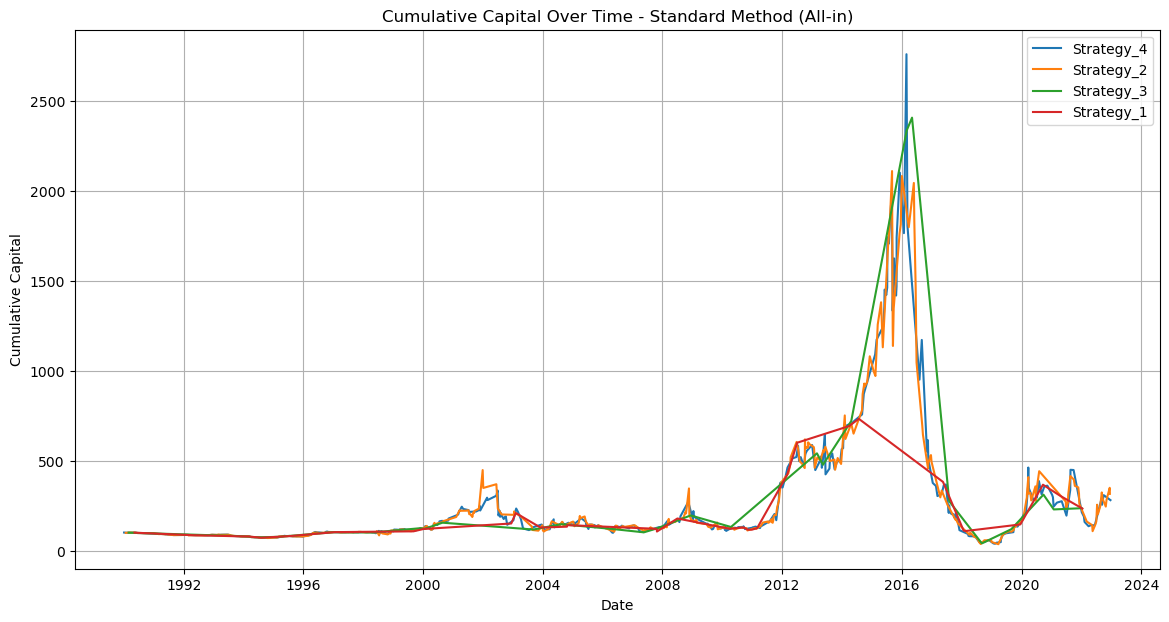

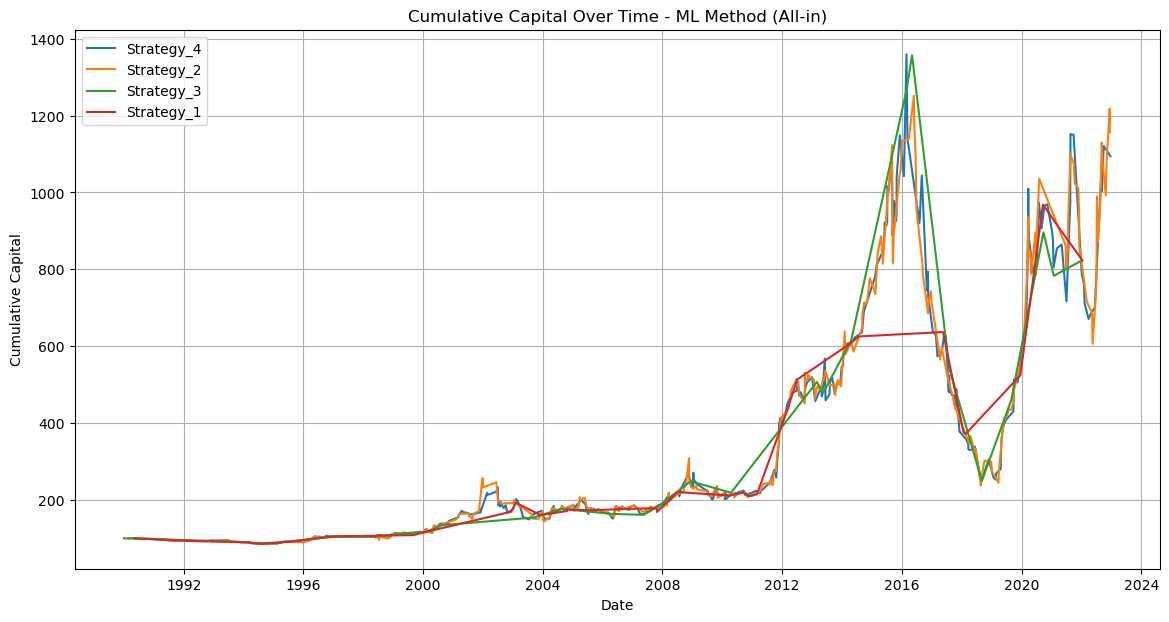

Standard Approach Metrics:
ROI: 1.81
Maximum Drawdown: -0.99
Sharpe Ratio: -0.04
Sortino Ratio: -0.06
Win Rate: 0.50

ML Approach Metrics:
ROI: 9.94
Maximum Drawdown: -0.83
Sharpe Ratio: -0.13
Sortino Ratio: -0.19
Win Rate: 0.50


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import numpy as np

# Load the dataset
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')

# Ensure the data is sorted by the 'Entry_Date' column
train_data['Entry_Date'] = pd.to_datetime(train_data['Entry_Date'])
val_data['Entry_Date'] = pd.to_datetime(val_data['Entry_Date'])
test_data['Entry_Date'] = pd.to_datetime(test_data['Entry_Date'])

train_data = train_data.sort_values(by='Entry_Date')
val_data = val_data.sort_values(by='Entry_Date')
test_data = test_data.sort_values(by='Entry_Date')

# Define the feature sets manually
selected_features = ['SMA5_At_Entry', 'SMA10_At_Entry', 'EMA5_At_Entry', 'EMA15_At_Entry', 'RSI5_At_Entry', 'RSI10_At_Entry',
                     'ATR5_At_Entry', 'ATR15_At_Entry', 'Stoch7_K_At_Entry', 'Stoch21_K_At_Entry',
                     'BB10_High_At_Entry', 'BB10_Low_At_Entry', 'BB10_MAvg_At_Entry',
                     'BB15_High_At_Entry', 'BB15_Low_At_Entry', 'BB15_MAvg_At_Entry',
                     'Open', 'High', 'Low', 'Last', 'MACD_At_Entry', 'Day_Of_Week_At_Entry',
                     'ROC14_At_Entry', 'ROC15_At_Entry']

# Separating features and target variable
X_train = train_data[selected_features]
y_train = train_data['Target']
X_val = val_data[selected_features]
y_val = val_data['Target']
X_test = test_data[selected_features]
y_test = test_data['Target']

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=20,
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=10,
    random_state=42
)

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Apply Platt scaling using CalibratedClassifierCV
calibrated_rf_clf = CalibratedClassifierCV(base_estimator=rf_clf, method='sigmoid')
calibrated_rf_clf.fit(X_train, y_train)

# Ensure Strategy_Code is correctly mapped to each Trade_ID
unique_strategies = test_data['Strategy'].unique()
strategy_mapping = {unique_strategies[i]: f'strategy_{i+1}' for i in range(len(unique_strategies))}
test_data['Strategy_Code'] = test_data['Strategy'].map(strategy_mapping)

# Verify that the mapping is correct
for strategy in unique_strategies:
    strategy_code = strategy_mapping[strategy]
    assert all(test_data[test_data['Strategy'] == strategy]['Strategy_Code'] == strategy_code), f"Mismatch in mapping for {strategy}"

# Predict the confidence scores using the calibrated Random Forest model
test_data['Predicted_Confidence'] = calibrated_rf_clf.predict_proba(X_test)[:, 1]  # Assuming positive class confidence

# Initialize initial capital
initial_capital = 100  # Example initial capital

# Initialize dataframes to store capital allocation and cumulative capital for each approach
columns = ['Trade_ID', 'Strategy', 'Profit_Loss', 'Predicted_Confidence', 'Allocated_Capital', 'Strat_Cum', 'Total_Cum', 'Entry_Date']
standard_df = pd.DataFrame(columns=columns)
ml_df = pd.DataFrame(columns=columns)

# Initialize capital for standard and ML approaches
capital_standard = initial_capital
capital_ml = initial_capital

# Function to record a trade
def record_trade(df, trade_id, original_strategy, profit_loss, predicted_confidence, allocated_capital, cumulative_capital_strategy, cumulative_capital, entry_date):
    new_row = pd.DataFrame([{
        'Trade_ID': trade_id,
        'Strategy': original_strategy,  # Keep the original strategy label
        'Profit_Loss': profit_loss,
        'Predicted_Confidence': predicted_confideiuynce,
        'Allocated_Capital': allocated_capital,
        'Strat_Cum': cumulative_capital_strategy,
        'Total_Cum': cumulative_capital,
        'Entry_Date': entry_date
    }])
    return pd.concat([df, new_row], ignore_index=True)

# Function to execute trades for the All-in method
def execute_trades(test_data, capital, record_df, use_ml):
    for date, trades_on_date in test_data.groupby('Entry_Date'):
        # Identify active strategies on this date
        active_strategies = trades_on_date['Strategy_Code'].unique()
        num_active_strategies = len(active_strategies)
        
        # Allocate capital equally among active strategies
        allocated_capital = {strategy: capital / num_active_strategies for strategy in active_strategies}
        
        for idx, trade in trades_on_date.iterrows():
            strategy = trade['Strategy_Code']
            original_strategy = trade['Strategy']  # Use the original strategy name
            trade_id = trade['Trade_ID']
            predicted_confidence = trade['Predicted_Confidence']
            profit_loss = trade['Profit_Loss']
            
            if use_ml:
                # Adjust allocation based on predicted confidence
                adjusted_allocation = allocated_capital[strategy] * predicted_confidence
                
                # Update capital based on adjusted allocation and trade outcome
                capital += adjusted_allocation * profit_loss
                
                # Record the trade in the dataframe
                record_df = record_trade(
                    record_df, trade_id, original_strategy, profit_loss, predicted_confidence,
                    adjusted_allocation, capital, capital, date
                )
            else:
                # Standard approach: equal allocation
                capital += allocated_capital[strategy] * profit_loss
                
                # Record the trade in the dataframe
                record_df = record_trade(
                    record_df, trade_id, original_strategy, profit_loss, predicted_confidence,
                    allocated_capital[strategy], capital, capital, date
                )
    
    return record_df, capital

# Execute trades for the standard approach
standard_df, final_capital_standard = execute_trades(test_data, capital_standard, standard_df, use_ml=False)

# Execute trades for the ML approach
ml_df, final_capital_ml = execute_trades(test_data, capital_ml, ml_df, use_ml=True)

# Calculate total profit/loss
total_profit_loss_standard = final_capital_standard - initial_capital
total_profit_loss_ml = final_capital_ml - initial_capital

# Output the final capital for each strategy and total profit/loss
print("Standard Approach Final Capital:")
for strategy, capital in final_cumulative_capital_strategy_standard.items():
    print(f"{strategy}: {capital}")
print(f"Standard Approach Total Profit/Loss: {total_profit_loss_standard}")

print("\nML Approach Final Capital:")
for strategy, capital in final_cumulative_capital_strategy_ml.items():
    print(f"{strategy}: {capital}")
print(f"ML Approach Total Profit/Loss: {total_profit_loss_ml}")

# Save the dataframes to CSV files
standard_df.to_csv('standard_allocation(all_in).csv', index=False)
ml_df.to_csv('ml_allocation(all_in).csv', index=False)

# Plot cumulative capital over time for the standard method
plt.figure(figsize=(14, 7))
for strategy in unique_strategies:
    strategy_data = standard_df[standard_df['Strategy'] == strategy]
    plt.plot(strategy_data['Entry_Date'], strategy_data['Strat_Cum'], label=strategy)
plt.xlabel('Date')
plt.ylabel('Cumulative Capital')
plt.title('Cumulative Capital Over Time - Standard Method (All-in)')
plt.legend()
plt.grid(True)
plt.savefig('standard_allocation(all_in).png')
plt.show()

# Plot cumulative capital over time for the ML method
plt.figure(figsize=(14, 7))
for strategy in unique_strategies:
    strategy_data = ml_df[ml_df['Strategy'] == strategy]
    plt.plot(strategy_data['Entry_Date'], strategy_data['Strat_Cum'], label=strategy)
plt.xlabel('Date')
plt.ylabel('Cumulative Capital')
plt.title('Cumulative Capital Over Time - ML Method (All-in)')
plt.legend()
plt.grid(True)
plt.savefig('ml_allocation(all_in).png')
plt.show()

# Function to calculate ROI
def calculate_roi(final_capital, initial_capital):
    return (final_capital - initial_capital) / initial_capital

# Function to calculate maximum drawdown
def calculate_max_drawdown(cumulative_returns):
    roll_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / roll_max - 1.0
    max_drawdown = drawdown.cummin().min()
    return max_drawdown

# Function to calculate Sharpe ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

# Function to calculate Sortino ratio
def calculate_sortino_ratio(returns, risk_free_rate=0.01):
    downside_returns = returns[returns < risk_free_rate]
    expected_return = returns.mean() - risk_free_rate
    downside_deviation = downside_returns.std()
    return expected_return / downside_deviation

# Function to calculate win rate
def calculate_win_rate(profits):
    wins = (profits > 0).sum()
    total = len(profits)
    return wins / total

# Standard approach metrics
standard_roi = calculate_roi(final_capital_standard, initial_capital)
standard_max_drawdown = calculate_max_drawdown(standard_df['Strat_Cum'])
standard_returns = standard_df['Strat_Cum'].pct_change().dropna()
standard_sharpe_ratio = calculate_sharpe_ratio(standard_returns)
standard_sortino_ratio = calculate_sortino_ratio(standard_returns)
standard_win_rate = calculate_win_rate(standard_df['Profit_Loss'])

# ML approach metrics
ml_roi = calculate_roi(final_capital_ml, initial_capital)
ml_max_drawdown = calculate_max_drawdown(ml_df['Strat_Cum'])
ml_returns = ml_df['Strat_Cum'].pct_change().dropna()
ml_sharpe_ratio = calculate_sharpe_ratio(ml_returns)
ml_sortino_ratio = calculate_sortino_ratio(ml_returns)
ml_win_rate = calculate_win_rate(ml_df['Profit_Loss'])

# Print the metrics
print("Standard Approach Metrics:")
print(f"ROI: {standard_roi:.2f}")
print(f"Maximum Drawdown: {standard_max_drawdown:.2f}")
print(f"Sharpe Ratio: {standard_sharpe_ratio:.2f}")
print(f"Sortino Ratio: {standard_sortino_ratio:.2f}")
print(f"Win Rate: {standard_win_rate:.2f}")

print("\nML Approach Metrics:")
print(f"ROI: {ml_roi:.2f}")
print(f"Maximum Drawdown: {ml_max_drawdown:.2f}")
print(f"Sharpe Ratio: {ml_sharpe_ratio:.2f}")
print(f"Sortino Ratio: {ml_sortino_ratio:.2f}")
print(f"Win Rate: {ml_win_rate:.2f}")
